In [1]:
# 1. Import Library
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [2]:
# 2. Load Dataset
df = pd.read_csv('alternative_metal_bands.csv')
df.head()

,Band,Origin,Active,Genres
0,10 Years,United States,Yes,"Post-grunge, Progressive metal."
1,12 Stones,United States,Yes,"Post-grunge, Alternative rock, Christian rock."
2,36 Crazyfists,United States,No,"Metalcore, Post-hardcore, Nu metal."
3,311,United States,Yes,"Reggae rock, Alternative rock, Rap metal, Funk..."
4,3Teeth,United States,Yes,"Industrial metal, Industrial, Industrial rock,..."


In [3]:
# 3. Vectorisasi Genre menggunakan TF-IDF
tfidf = TfidfVectorizer(stop_words='english')
X = tfidf.fit_transform(df['Genres'])

In [4]:
# 4. KMeans Clustering (misalnya 5 cluster)
k = 5
model = KMeans(n_clusters=k, random_state=42)
model.fit(X)
df['Cluster'] = model.labels_

In [5]:
# 5. Tampilkan beberapa band dari tiap cluster
for i in range(k):
    print(f"\nCluster {i}:")
    print(df[df['Cluster'] == i]['Band'].head(10).to_string(index=False))


Cluster 0:
                 Alcest
        Alice in Chains
           Apocalyptica
      Avenged Sevenfold
              Babymetal
              Bad Omens
               Baroness
      Black Veil Brides
Bullet for My Valentine
              Devilskin

Cluster 1:
       36 Crazyfists
  American Standards
          Architects
   Asking Alexandria
     At the Drive-In
          Bad Brains
           Beartooth
Bring Me the Horizon
              Clutch
         Code Orange

Cluster 2:
              3Teeth
     40 Below Summer
American Head Charge
     Anew Revolution
        Apartment 26
              Avatar
          Clawfinger
        Coal Chamber
        Demon Hunter
              Depswa

Cluster 3:
                                 311
                            All Ends
                      Alien Ant Farm
                    A Perfect Circle
                          Audioslave
                The Butterfly Effect
                    Butthole Surfers
Daron Malakian and Scars on Broad

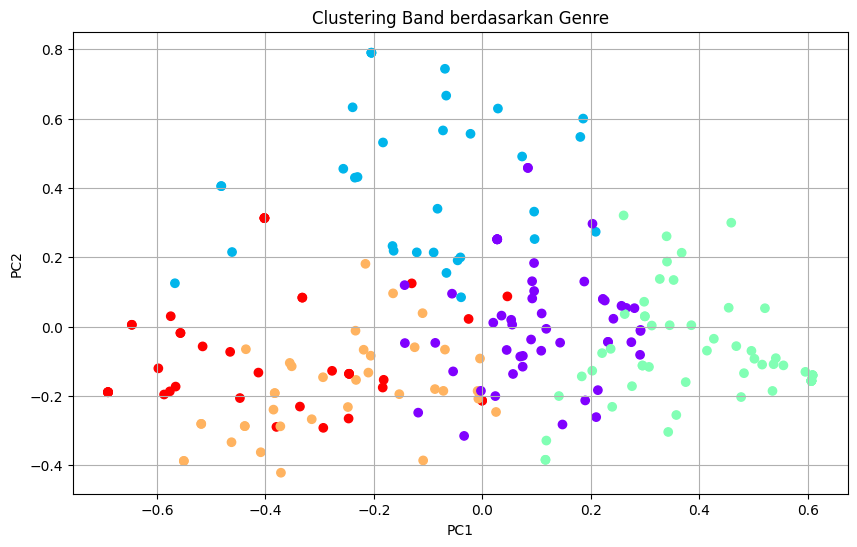

In [6]:
# 6. Visualisasi menggunakan PCA
pca = PCA(n_components=2)
reduced = pca.fit_transform(X.toarray())

plt.figure(figsize=(10, 6))
plt.scatter(reduced[:, 0], reduced[:, 1], c=model.labels_, cmap='rainbow')
plt.title('Clustering Band berdasarkan Genre')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid(True)
plt.show()